In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
df = pd.read_csv("Combined_i80.csv")
df.head()

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_Length,v_Width,v_Class,v_Vel,v_Acc,Lane_ID,Preceding,Following,Space_Headway,Time_Headway,Location,Period
0,1,12,884,1113433136100,16.884,52.747821,6042842.116,2133117.662,14.3,6.4,2,6.947704,2.188888,2,0,0,0.0,0.0,i80,4:00PM - 4:15PM
1,1,13,884,1113433136200,16.938,53.454997,6042842.012,2133118.909,14.3,6.4,2,7.195818,3.152102,2,0,0,0.0,0.0,i80,4:00PM - 4:15PM
2,1,14,884,1113433136300,16.991,54.190893,6042841.908,2133120.155,14.3,6.4,2,7.522104,3.871618,2,0,0,0.0,0.0,i80,4:00PM - 4:15PM
3,1,15,884,1113433136400,17.045,54.961816,6042841.805,2133121.402,14.3,6.4,2,7.896343,4.184370,2,0,0,0.0,0.0,i80,4:00PM - 4:15PM
4,1,16,884,1113433136500,17.098,55.771003,6042841.701,2133122.649,14.3,6.4,2,8.287402,3.906572,2,0,0,0.0,0.0,i80,4:00PM - 4:15PM


In [3]:
global_times = df['Global_Time']

# Convert timestamps to datetime objects
timestamps = [datetime.fromtimestamp(time / 1000) for time in global_times]

# Format datetime objects as dd.mm.yyyy
formatted_dates = [timestamp.strftime("%d.%m.%Y") for timestamp in timestamps]


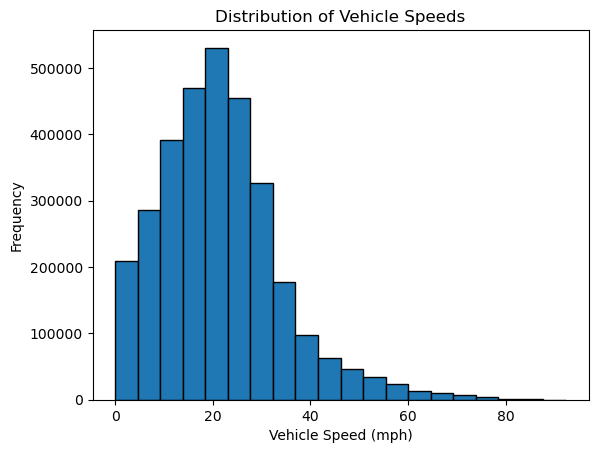

In [4]:


# Extract the 'v_Vel' column for vehicle speeds
vehicle_speeds = df['v_Vel']

# Create the histogram
plt.hist(vehicle_speeds, bins=20, edgecolor='black')

# Add labels and title
plt.xlabel('Vehicle Speed (mph)')
plt.ylabel('Frequency')
plt.title('Distribution of Vehicle Speeds')

# Show the histogram
plt.show()


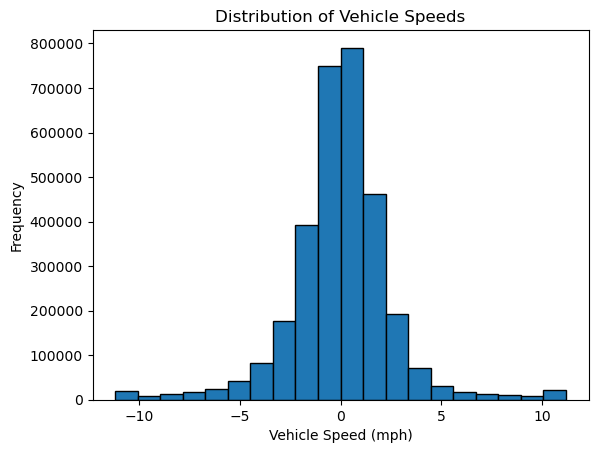

In [5]:

# Extract the 'v_Vel' column for vehicle speeds
vehicle_speeds = df['v_Acc']

# Create the histogram
plt.hist(vehicle_speeds, bins=20, edgecolor='black')

# Add labels and title
plt.xlabel('Vehicle Speed (mph)')
plt.ylabel('Frequency')
plt.title('Distribution of Vehicle Speeds')

# Show the histogram
plt.show()

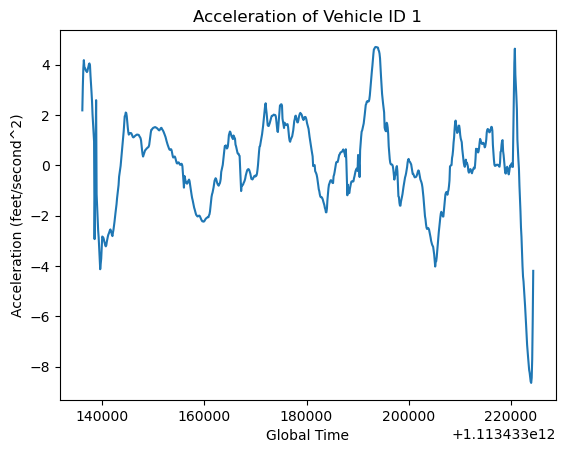

In [6]:

# Select a specific vehicle ID for comparison
vehicle_id = 1

# Filter the dataset for the selected vehicle ID
vehicle_data = df[df['Vehicle_ID'] == vehicle_id]

# Extract the acceleration and global time columns
acc = vehicle_data['v_Acc']
global_time = vehicle_data['Global_Time']

# Create a line plot of acceleration over global time
plt.plot(global_time, acc)

# Add labels and title
plt.xlabel('Global Time')
plt.ylabel('Acceleration (feet/second^2)')
plt.title('Acceleration of Vehicle ID {}'.format(vehicle_id))

# Show the plot
plt.show()

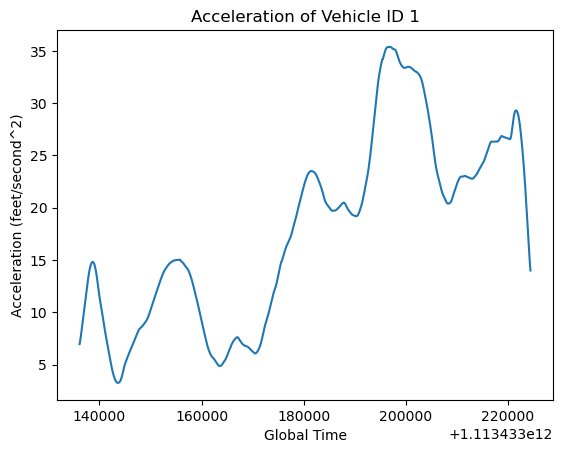

In [7]:

# Select a specific vehicle ID for comparison
vehicle_id = 1

# Filter the dataset for the selected vehicle ID
vehicle_data = df[df['Vehicle_ID'] == vehicle_id]

# Extract the acceleration and global time columns
Vel = vehicle_data['v_Vel']
global_time = vehicle_data['Global_Time']

# Create a line plot of acceleration over global time
plt.plot(global_time, Vel)

# Add labels and title
plt.xlabel('Global Time')
plt.ylabel('Acceleration (feet/second^2)')
plt.title('Acceleration of Vehicle ID {}'.format(vehicle_id))

# Show the plot
plt.show()

In [8]:
dd

NameError: name 'dd' is not defined